In [1]:
import pandas as pd
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

import nltk
from nltk import FreqDist
import ssl
#nltk.download("stopwords")

#libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from utls.words import freq_words
from utls.words import remove_stop_words
from utls.words import lemmatization

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#download stopping words
#once is okay no need to run twice
"""
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download("stopwords")
"""

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tsunami/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#download lemmatization from spaCy
#!python -m spacy download en

In [2]:
df_raw = pd.read_csv('/Users/tsunami/glass_view//rawdat/wells_fargo_reviews.csv') # 16 columns, 1007 rows
#df_raw.head()

In [3]:
# remove stopwords 
rev_pro = remove_stop_words(df_raw, 'pros')
rev_con = remove_stop_words(df_raw, 'cons')

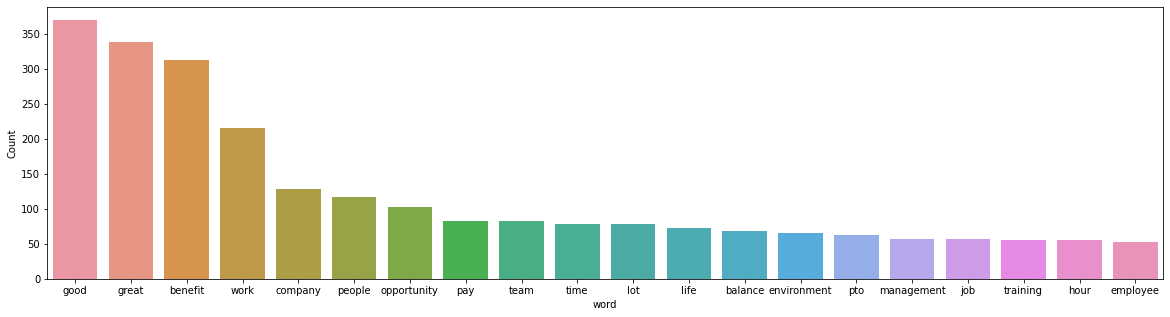

In [4]:
# lemmatization: only nouns and adjectives and assign back
tk_pro = lemmatization(pd.Series(rev_pro).apply(lambda x: x.split()))
tk_pro_final = []
for i in range(len(tk_pro)):
    tk_pro_final.append(' '.join(tk_pro[i]))
    
freq_words(tk_pro_final,20)

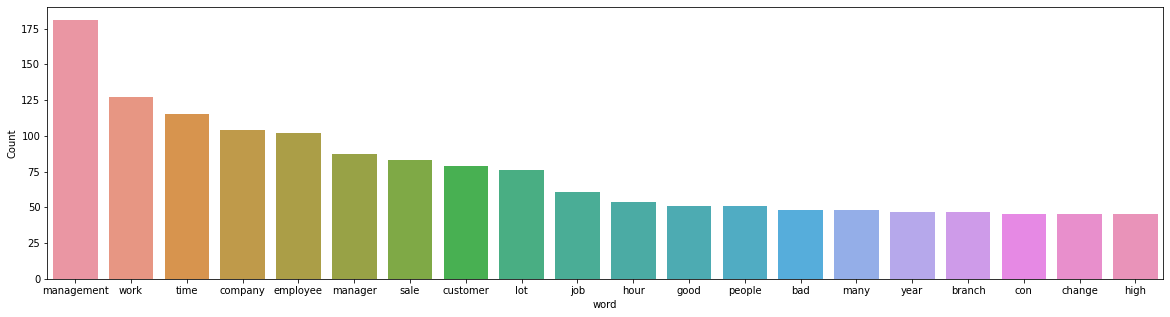

In [5]:
# lemmatization: only nouns and adjectives and assign back
tk_con = lemmatization(pd.Series(rev_con).apply(lambda x: x.split()))
tk_con_final = []
for i in range(len(tk_con)):
    tk_con_final.append(' '.join(tk_con[i]))
    
freq_words(tk_con_final,20)

## GlassDoor Review has 5 categories
1. Culture and Values
2. Work/Life Balance
3. Senior Management
4. Compensation and Benefits
5. Career Opportunities

In the remaining parts, classify pro and con reviews into 5 classes.

In [6]:
dictionary = corpora.Dictionary(tk_pro)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tk_pro]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=100,
                chunksize=1000, passes=50)

In [7]:
lda_model.print_topics()

[(0,
  '0.134*"opportunity" + 0.131*"company" + 0.120*"great" + 0.113*"lot" + 0.099*"employee" + 0.087*"large" + 0.010*"growth" + 0.009*"development" + 0.006*"potential" + 0.005*"career"'),
 (1,
  '0.063*"good" + 0.054*"work" + 0.036*"benefit" + 0.027*"great" + 0.021*"pay" + 0.020*"team" + 0.018*"life" + 0.017*"balance" + 0.017*"people" + 0.014*"management"'),
 (2,
  '0.175*"hour" + 0.151*"benefit" + 0.144*"coworker" + 0.129*"parking" + 0.007*"promotion" + 0.006*"quarterly" + 0.005*"person" + 0.004*"teller" + 0.003*"financial" + 0.003*"risk"'),
 (3,
  '0.161*"great" + 0.091*"environment" + 0.087*"time" + 0.085*"benefit" + 0.071*"friendly" + 0.069*"employee" + 0.068*"office" + 0.068*"part" + 0.065*"food" + 0.063*"cafe"'),
 (4,
  '0.127*"good" + 0.087*"benefit" + 0.082*"great" + 0.045*"people" + 0.044*"decent" + 0.040*"worker" + 0.039*"pto" + 0.039*"training" + 0.038*"salary" + 0.037*"level"')]

## 5 Classes should match GlassDoor 5 review categories
1. 0 --> Career Opportunities
2. 1 --> Senior Management
3. 2 --> Compensation and Benefits
4. 3 --> Culture and Values
5. 4 --> Compensation and Benefits

In [8]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.121535  0.002443       1        1  60.050358
4     -0.121808 -0.251718       2        1  12.912051
0      0.221187 -0.021818       3        1  12.647872
3      0.168317  0.044788       4        1   8.278699
2     -0.146161  0.226305       5        1   6.111023, topic_info=            Term        Freq       Total Category  logprob  loglift
26       benefit  274.000000  274.000000  Default  30.0000  30.0000
12         great  309.000000  309.000000  Default  29.0000  29.0000
0           good  301.000000  301.000000  Default  28.0000  28.0000
5        company  117.000000  117.000000  Default  27.0000  27.0000
160  opportunity   94.000000   94.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
291       moment    0.423376    1.301004   Topic5  -6.6881   1.6724
287    operation    0.424109    2.751303   Topic5  -6.6864   0.9252
357          pro    0.424093    1.696543   Topic5  -6.6864   1.4087
367          air    0.423866    1.924759   Topic5  -6.6870   1.2819
441     valuable    0.423174    1.925362   Topic5  -6.6886   1.2800

[229 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
157       1  0.996626  advancement
463       5  0.714704      advisor
367       1  0.519545          air
355       1  0.756443       amount
355       2  0.151289       amount
...     ...       ...          ...
266       2  0.607882    volunteer
59        2  0.985295          way
33        1  0.999003         work
218       2  0.983157       worker
104       1  0.986778         year

[173 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 4, 3])

In [6]:
# save to local
df_raw.to_csv('output/review_clnd.csv', index=False)